### Before you begin

To check whether the code you've written is correct, we'll use **automark**. For this, we created for each of you an account with the username being your student number.

In [1]:
import automark as am

# fill in you student number as your username
am.configure(username='15907112')

# to check your progress, you can run this function
am.get_progress()

----------------------------------------------------------------------
| Brekel, Skipper van den                                            |
----------------------------------------------------------------------
| a0_t1_sailor_avg_experience                       | completed      |
| a0_t2_sailor_avg_experience_pyspark               | completed      |
| a1a_t1_all_model_number_b                         | completed      |
| a1a_t2_all_model_number_not_b                     | completed      |
| a1a_t3_avg_PCs_speed                              | completed      |
| a1a_t4_max_printer_price                          | completed      |
| a1a_t5_min_spending_visa                          | completed      |
| a1a_t6_customer_id                                | completed      |
| a1a_t7_highest_price_USD                          | completed      |
| a1b_t1a_at_least_four_products                    | completed      |
| a1b_t1b_decending_speed_laptop                    | completed      |
| a1b_

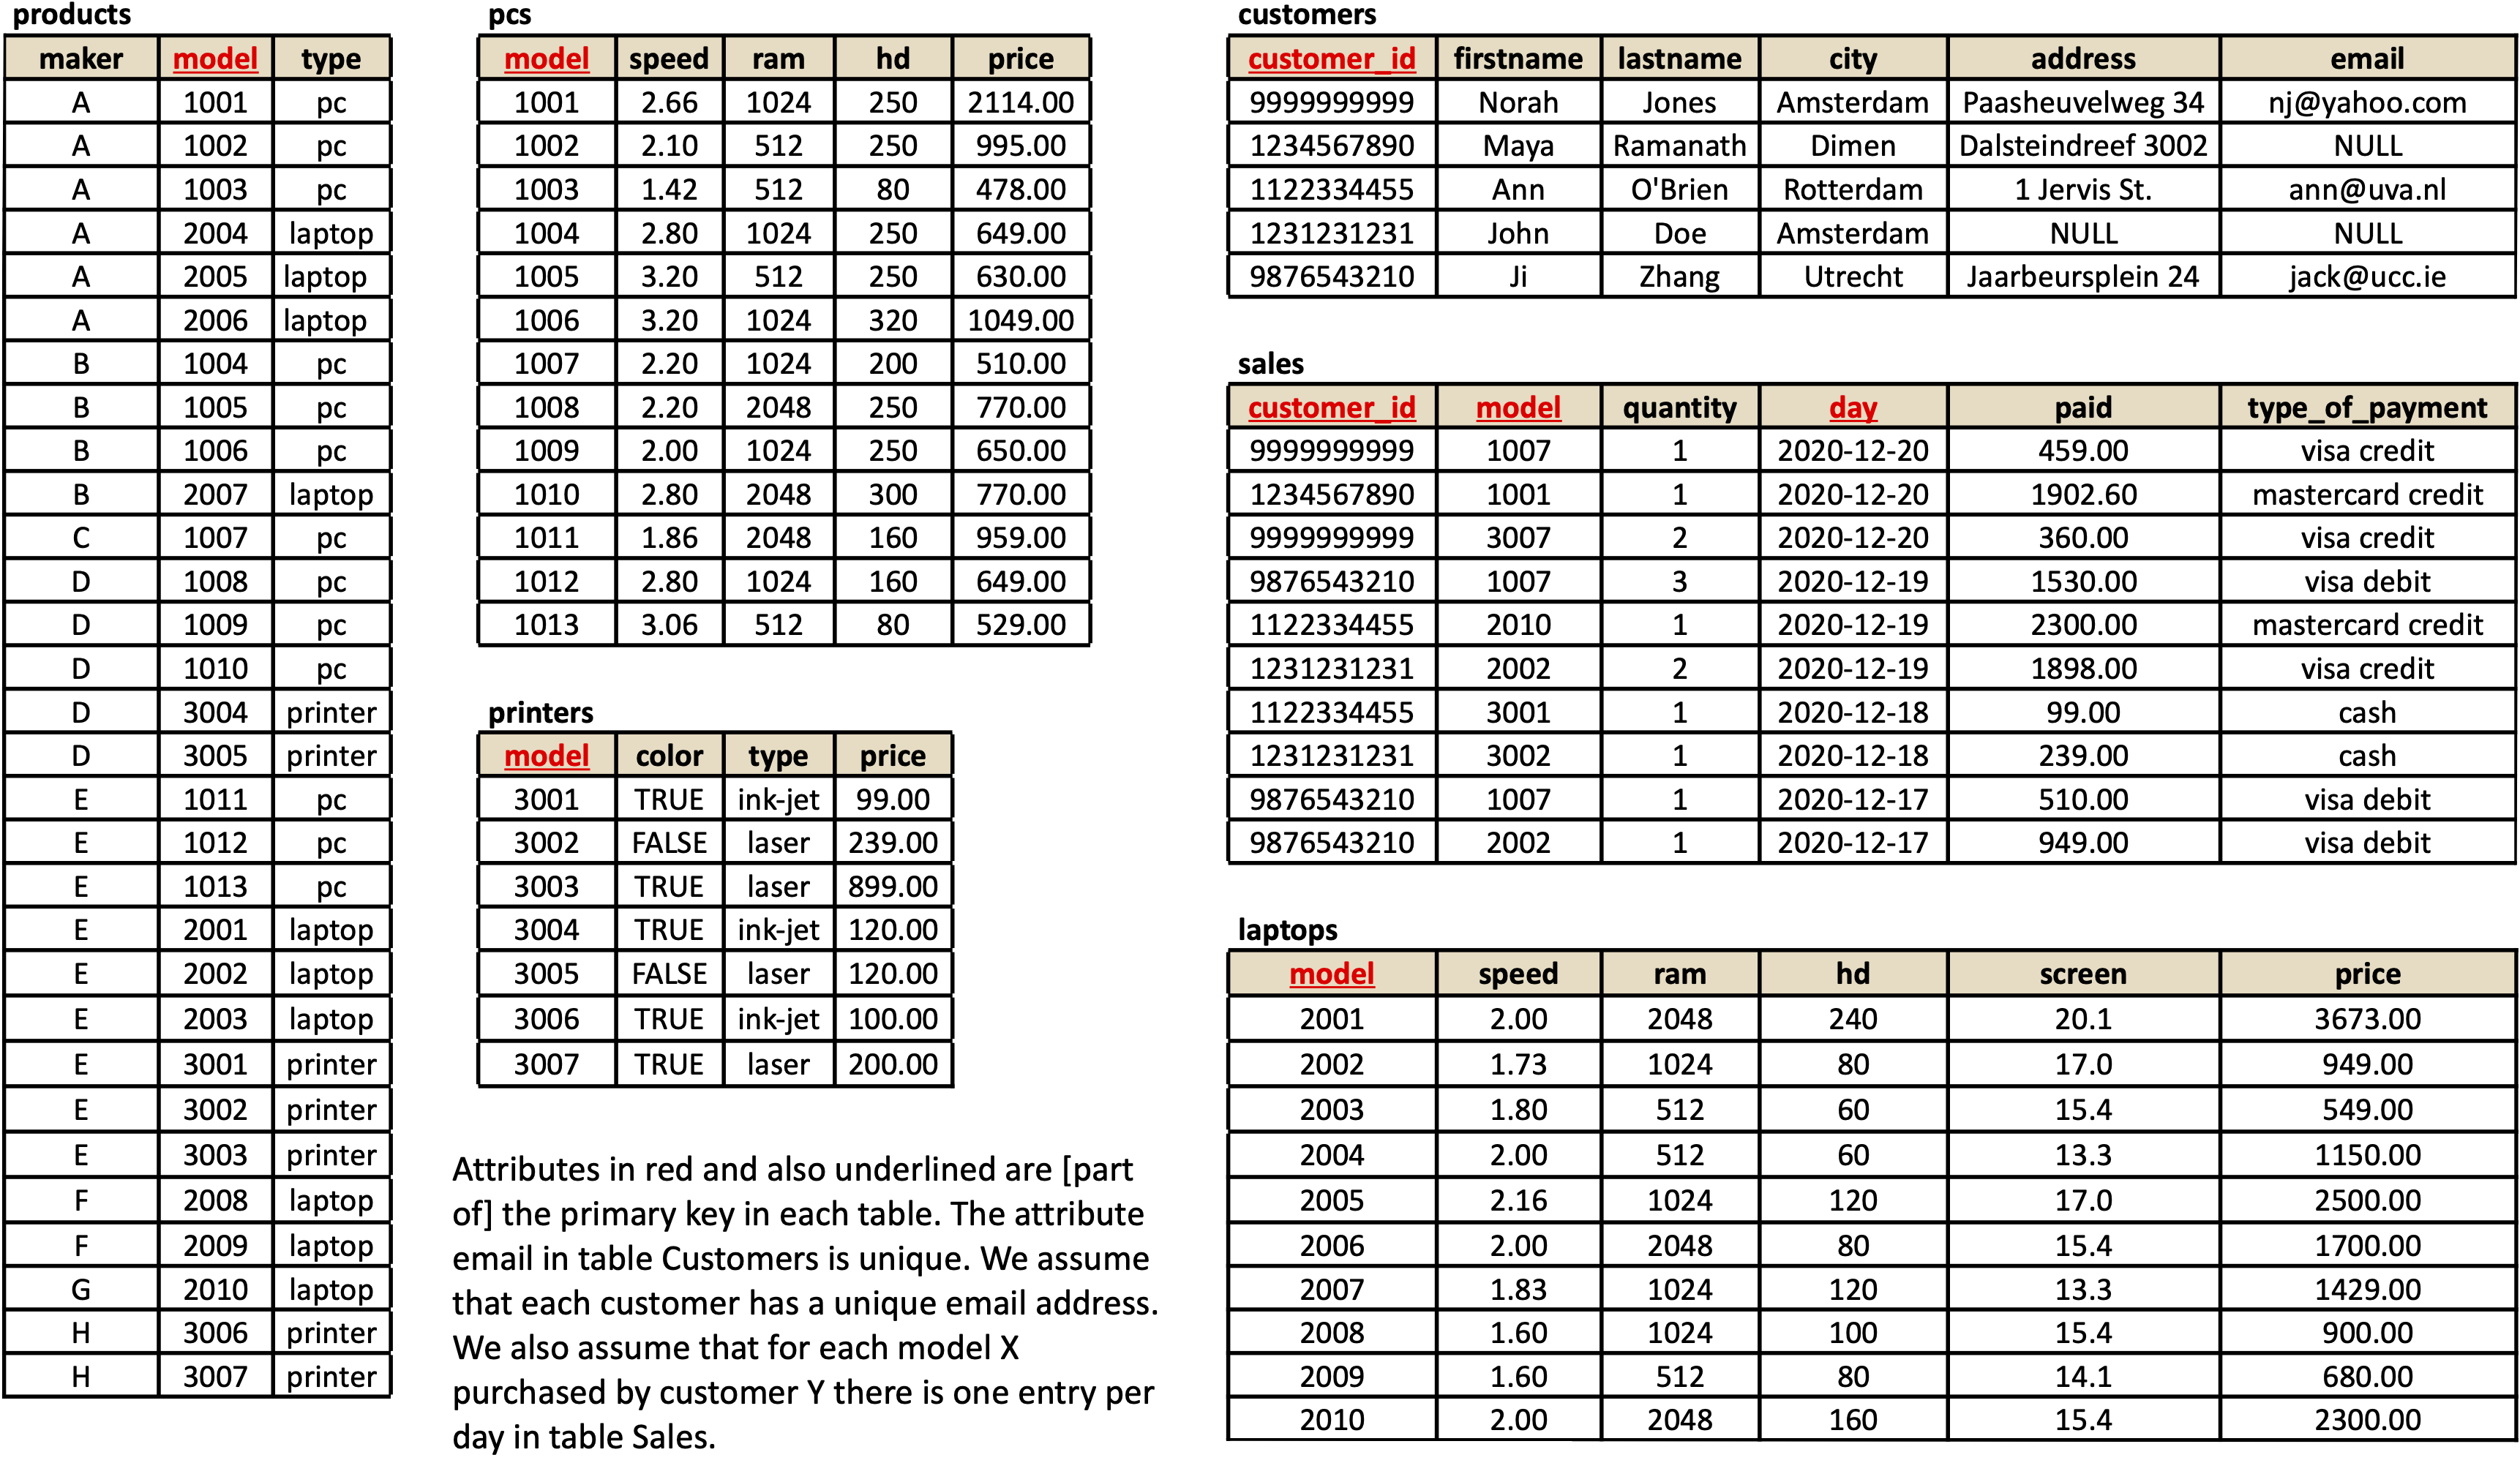## Settings things up for the excerises

In this assignment, we work with an example database consisting of the following six tables:

<img src="schema.png" alt="Schema of the Database" width="900"/>

### DuckDB

We will query this database with [DuckDB](https://duckdb.org/), an embeddable analytical database management system, developed by the [CWI Amsterdam](https://www.cwi.nl/research/groups/database-architectures). 

DuckDB is designed to be easy to install and allows to seamlessly work in a jupyter notebook.

DuckDB also provides a [SQL Introduction](https://duckdb.org/docs/sql/introduction) that you can refer to when working on this assignment.

In [2]:
import duckdb

We connect to an in-memory database.

In [3]:
con = duckdb.connect(database=':memory:')

Next, we create all the relations using SQL

In [4]:
# Customers Table
con.execute('''
CREATE TABLE IF NOT EXISTS customers (
    customer_id char(10) NOT NULL, 
    firstname varchar(32) default NULL, 
    lastname varchar(32) default NULL, 
    city varchar(32) default NULL,
    address varchar(128) default NULL, 
    email varchar(128) default NULL, 
    
    PRIMARY KEY (customer_id) )
''')

# Laptops Table
con.execute('''
CREATE TABLE IF NOT EXISTS laptops (
    model char(4) NOT NULL default '',
    speed double default NULL, 
    ram int default NULL, 
    hd int default NULL, 
    screen double default NULL, 
    price double default NULL, 
    
    PRIMARY KEY  (model) )
''')

# PCs Table
con.execute('''
CREATE TABLE IF NOT EXISTS pcs (
    model char(4) NOT NULL, 
    speed double NOT NULL, 
    ram int NOT NULL, 
    hd int NOT NULL, 
    price double NOT NULL, 
    
    PRIMARY KEY  (model) )
''')

# Printers Table
con.execute('''CREATE TABLE IF NOT EXISTS printers (
    model char(4) NOT NULL default '', 
    color varchar(5) default NULL, 
    type varchar(10) default NULL,
    price double default NULL,

    PRIMARY KEY  (model) )
''')

# Products Table
con.execute('''CREATE TABLE IF NOT EXISTS products ( 
    maker char(1) default NULL,
    model char(4) NOT NULL default '',
    type varchar(10) default NULL,

PRIMARY KEY  (model) )
''')

# Sales Table
con.execute('''CREATE TABLE IF NOT EXISTS sales ( 
    customer_id char(10) NOT NULL default '', 
    model char(4) NOT NULL default '',   
    quantity int default NULL,   
    day date NOT NULL default '0000-00-00', 
    paid double default NULL,   
    type_of_payment varchar(32) default NULL,   
    
    PRIMARY KEY  (customer_id,model,day) )
''')

And fill the tables with some example data

In [5]:
# Customers Table
con.execute('''
INSERT INTO customers (customer_id, firstname, lastname, city, address, email)
VALUES 
    ('1122334455', 'Ann', 'O''Brien', 'Rotterdam', '1 Jervis St.', 'ann@uva.nl'), 
    ('1231231231', 'John', 'Doe', 'Amsterdam', NULL, NULL), 
    ('1234567890', 'Maya', 'Ramanath', 'Diemen', 'Dalsteindreef 3002', NULL),
    ('9876543210', 'Ji', 'Zhang', 'Utrecht', 'Jaarbeursplien 24', 'jack@ucc.ie'), 
    ('9999999999', 'Norah', 'Jones', 'Amsterdam', 'Passheuvelweg 34', 'nj@yahoo.com');
''')

# Laptops Table
con.execute('''
INSERT INTO laptops (model, speed, ram, hd, screen, price) 
VALUES 
    ('2001', 2, 2048, 240, 20.1, 3673),
    ('2002', 1.73, 1024, 80, 17, 949), 
    ('2003', 1.8, 512, 60, 15.4, 549), 
    ('2004', 2, 512, 60, 13.3, 1150),
    ('2005', 2.16, 1024, 120, 17, 2500), 
    ('2006', 2, 2048, 80, 15.4, 1700), 
    ('2007', 1.83, 1024, 120, 13.3, 1429),
    ('2008', 1.6, 1024, 100, 15.4, 900), 
    ('2009', 1.6, 512, 80, 14.1, 680), 
    ('2010', 2, 2048, 160, 15.4, 2300);
''')

# PCs Table
con.execute('''
INSERT INTO pcs (model, speed, ram, hd, price) 
VALUES 
    ('1001', 2.66, 1024, 250, 2114),
    ('1002', 2.1, 512, 250, 995), 
    ('1003', 1.42, 512, 80, 478), 
    ('1004', 2.8, 1024, 250, 649), 
    ('1005', 3.2, 512, 250, 630), 
    ('1006', 3.2, 1024, 320, 1049), 
    ('1007', 2.2, 1024, 200, 510), 
    ('1008', 2.2, 2048, 250, 770), 
    ('1009', 2, 1024, 250, 650), 
    ('1010', 2.8, 2048, 300, 770),
    ('1011', 1.86, 2048, 160, 959), 
    ('1012', 2.8, 1024, 160, 649), 
    ('1013', 3.06, 512, 80, 529);
''')

# Printers Table
con.execute('''
INSERT INTO printers (model, color, type, price) 
VALUES 
    ('3001', 'TRUE', 'ink-jet', 99),
    ('3002', 'FALSE', 'laser', 239), 
    ('3003', 'TRUE', 'laser', 899), 
    ('3004', 'TRUE', 'ink-jet', 120),
    ('3005', 'FALSE', 'laser', 120), 
    ('3006', 'TRUE', 'ink-jet', 100), 
    ('3007', 'TRUE', 'laser', 200);
''')

# Products Table
con.execute('''
INSERT INTO products (maker, model, type) 
VALUES 
    ('A', '1001', 'pc'), 
    ('A', '1002', 'pc'),
    ('A', '1003', 'pc'), 
    ('B', '1004', 'pc'), 
    ('B', '1005', 'pc'), 
    ('B', '1006', 'pc'), 
    ('C', '1007', 'pc'),
    ('D', '1008', 'pc'), 
    ('D', '1009', 'pc'), 
    ('D', '1010', 'pc'), 
    ('E', '1011', 'pc'), 
    ('E', '1012', 'pc'),
    ('E', '1013', 'pc'), 
    ('E', '2001', 'laptop'), 
    ('E', '2002', 'laptop'), 
    ('E', '2003', 'laptop'),
    ('A', '2004', 'laptop'), 
    ('A', '2005', 'laptop'), 
    ('A', '2006', 'laptop'), 
    ('B', '2007', 'laptop'),
    ('F', '2008', 'laptop'), 
    ('F', '2009', 'laptop'), 
    ('G', '2010', 'laptop'), 
    ('E', '3001', 'printer'), 
    ('E', '3002', 'printer'), 
    ('E', '3003', 'printer'), 
    ('D', '3004', 'printer'), 
    ('D', '3005', 'printer'),
    ('H', '3006', 'printer'), 
    ('H', '3007', 'printer'); 
''')

# Sales Table
con.execute('''
INSERT INTO sales (customer_id, model, quantity, day, paid, type_of_payment) 
VALUES 
    ('1122334455', '2010', 1, '2020-12-19', 2300, 'mastercard credit'), 
    ('1122334455', '3001', 1, '2020-12-18', 99, 'cash'), 
    ('1231231231', '2002', 2, '2020-12-19', 1898, 'visa credit'), 
    ('1231231231', '3002', 1, '2020-12-18', 239, 'cash'), 
    ('1234567890', '1001', 1, '2020-12-20', 1902.6, 'mastercard credit'),
    ('9876543210', '1007', 1, '2020-12-17', 510, 'visa debit'), 
    ('9876543210', '1007', 3, '2020-12-19', 1530, 'visa debit'), 
    ('9876543210', '2002', 1, '2020-12-17', 949, 'visa debit'), 
    ('9999999999', '1007', 1, '2020-12-20', 459, 'visa credit'), 
    ('9999999999', '3007', 2, '2020-12-20', 360, 'visa credit');
''')

Now, we can query the database using SQL and convert the results to pandas dataframes to look at them:

In [6]:
products = con.execute("SELECT * FROM products").fetchdf()
products

,maker,model,type
0,A,1001,pc
1,A,1002,pc
2,A,1003,pc
3,B,1004,pc
4,B,1005,pc
5,B,1006,pc
6,C,1007,pc
7,D,1008,pc
8,D,1009,pc
9,D,1010,pc


In [7]:
pcs = con.execute("SELECT * FROM pcs").fetchdf()
pcs

,model,speed,ram,hd,price
0,1001,2.66,1024,250,2114.0
1,1002,2.10,512,250,995.0
2,1003,1.42,512,80,478.0
3,1004,2.80,1024,250,649.0
4,1005,3.20,512,250,630.0
5,1006,3.20,1024,320,1049.0
6,1007,2.20,1024,200,510.0
7,1008,2.20,2048,250,770.0
8,1009,2.00,1024,250,650.0
9,1010,2.80,2048,300,770.0


In [8]:
printers = con.execute("SELECT * FROM printers").fetchdf()
printers

,model,color,type,price
0,3001,TRUE,ink-jet,99.0
1,3002,FALSE,laser,239.0
2,3003,TRUE,laser,899.0
3,3004,TRUE,ink-jet,120.0
4,3005,FALSE,laser,120.0
5,3006,TRUE,ink-jet,100.0
6,3007,TRUE,laser,200.0


In [9]:
sales = con.execute("SELECT * FROM sales").fetchdf()
sales

,customer_id,model,quantity,day,paid,type_of_payment
0,1122334455,2010,1,2020-12-19,2300.0,mastercard credit
1,1122334455,3001,1,2020-12-18,99.0,cash
2,1231231231,2002,2,2020-12-19,1898.0,visa credit
3,1231231231,3002,1,2020-12-18,239.0,cash
4,1234567890,1001,1,2020-12-20,1902.6,mastercard credit
5,9876543210,1007,1,2020-12-17,510.0,visa debit
6,9876543210,1007,3,2020-12-19,1530.0,visa debit
7,9876543210,2002,1,2020-12-17,949.0,visa debit
8,9999999999,1007,1,2020-12-20,459.0,visa credit
9,9999999999,3007,2,2020-12-20,360.0,visa credit


In [10]:
customers = con.execute("SELECT * FROM customers").fetchdf()
customers

,customer_id,firstname,lastname,city,address,email
0,1122334455,Ann,O'Brien,Rotterdam,1 Jervis St.,ann@uva.nl
1,1231231231,John,Doe,Amsterdam,NaN,NaN
2,1234567890,Maya,Ramanath,Diemen,Dalsteindreef 3002,NaN
3,9876543210,Ji,Zhang,Utrecht,Jaarbeursplien 24,jack@ucc.ie
4,9999999999,Norah,Jones,Amsterdam,Passheuvelweg 34,nj@yahoo.com


In [11]:
laptops = con.execute("SELECT * FROM laptops").fetchdf()
laptops

,model,speed,ram,hd,screen,price
0,2001,2.00,2048,240,20.1,3673.0
1,2002,1.73,1024,80,17.0,949.0
2,2003,1.80,512,60,15.4,549.0
3,2004,2.00,512,60,13.3,1150.0
4,2005,2.16,1024,120,17.0,2500.0
5,2006,2.00,2048,80,15.4,1700.0
6,2007,1.83,1024,120,13.3,1429.0
7,2008,1.60,1024,100,15.4,900.0
8,2009,1.60,512,80,14.1,680.0
9,2010,2.00,2048,160,15.4,2300.0


The following helper function allows us to run queries on the database:

In [12]:
def execute_local(query):
    con = duckdb.connect(database=':memory:', read_only=False)
    con.register('products', products)
    con.register('customers', customers)
    con.register('sales',sales)
    con.register('laptops',laptops)
    con.register('pcs',pcs)
    
    result = con.execute(query).fetchdf()
    
    return result

This code is required to display things in a nicer way.

In [13]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## Part A: Basic SQL Select Queries

In the following, we ask you to write a set of SQL queries for querying the database.


### Task 1. List only the model number of all products made by maker B.

In [27]:
def a1a_t1_all_model_number_b():
    """List only the model number of all products made by maker B.
    """
    
    query = "SELECT model FROM products WHERE maker='B'"
    
    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__model__|
|---|
|1004|
|1005|
|1006|
|2007|


In [28]:
execute_local(a1a_t1_all_model_number_b())

,model
0,1004
1,1005
2,1006
3,2007


In [29]:
am.test_student_function(a1a_t1_all_model_number_b)

Running local tests...
a1a_t1_all_model_number_b successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### Task 2. List the model numbers of all products not made by maker B.

In [107]:
def a1a_t2_all_model_number_not_b():
    """List the model numbers of all products not made by maker B."""
    query = "SELECT model FROM products WHERE NOT maker='B'"

    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__model__|
|---|
|1001|
|1002|
|1003|
|1007|
|1008|
|1009|
|1010|
|1011|
|1012|
|1013|
|2001|
|2002|
|2003|
|2004|
|2005|
|2006|
|2008|
|2009|
|2010|
|3001|
|3002|
|3003|
|3004|
|3005|
|3006|
|3007|

In [108]:
execute_local(a1a_t2_all_model_number_not_b())

,model
0,1001
1,1002
2,1003
3,1007
4,1008
5,1009
6,1010
7,1011
8,1012
9,1013


In [109]:
am.test_student_function(a1a_t2_all_model_number_not_b)

Running local tests...
a1a_t2_all_model_number_not_b successfully passed local tests
Running remote test...
Test was successful. Congratulations!


###  Task 3. Return the average speed of all PCs with speed >=3.00.

In [50]:
def a1a_t3_avg_PCs_speed():
    """Return the average speed all PCs with speed >= 3.00"""
    query = "SELECT AVG(speed) FROM pcs WHERE speed >= 3.00"
    
    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__avg(speed)__|
|---|
|3.153333|

In [51]:
execute_local(a1a_t3_avg_PCs_speed())

,avg(speed)
0,3.153333


In [52]:
am.test_student_function(a1a_t3_avg_PCs_speed)

Running local tests...
a1a_t3_avg_PCs_speed successfully passed local tests
Running remote test...
Test was successful. Congratulations!


###  Task 4. Return the price of the most expensive color laser printer.

In [53]:
def a1a_t4_max_printer_price():
    """Return the price of the most expensive color laser printer"""

    query = "SELECT MAX(price) FROM printers WHERE color='TRUE' AND type='laser'"
    
    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__max(price)__|
|---|
|899.0|

In [54]:
execute_local(a1a_t4_max_printer_price())

,max(price)
0,899.0


In [55]:
am.test_student_function(a1a_t4_max_printer_price)

Running local tests...
a1a_t4_max_printer_price successfully passed local tests
Running remote test...
Test was successful. Congratulations!


###  Task 5. Return the minimum amount paid by customers who used a visa card (debit or credit) to purchase a product.

In [58]:
def a1a_t5_min_spending_visa():
    """Return the minimum amount paid by customers who used a visa card (debit or credit) to purchase a product"""
    query = "SELECT MIN(paid) FROM sales WHERE type_of_payment='visa debit' OR type_of_payment='visa credit'"
   
    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__min(paid)__|
|---|
|360.0|

In [59]:
execute_local(a1a_t5_min_spending_visa())

,min(paid)
0,360.0


In [60]:
am.test_student_function(a1a_t5_min_spending_visa)

Running local tests...
a1a_t5_min_spending_visa successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### Task 6. Find the `customer_id` of customers who have the letter 'e' either in their first name or in their last name.

In [65]:
def a1a_t6_customer_id():
    """Find the customer_id of customers who have the letter 'e' either in their first name 
       or in their last name"""
    
    query = "SELECT customer_id FROM customers WHERE firstname LIKE '%e%' OR lastname LIKE '%e%'"
    
    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__customer_id__|
|---|
|1122334455|
|1231231231|
|9999999999|

In [66]:
execute_local(a1a_t6_customer_id())

,customer_id
0,1122334455
1,1231231231
2,9999999999


In [67]:
am.test_student_function(a1a_t6_customer_id)

Running local tests...
a1a_t6_customer_id successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### Task 7. Assume all prices in the Laptops table are in Euro. List the model numbers of all laptops with ram at least 1024. For each model, list also its price in USD. Assume that 1 USD = 0.85 EURO. Name the price column 'price (USD)'.

In [73]:
def a1a_t7_highest_price_USD():
    """Assume all prices in the table Laptops are in Euro. List the prices of laptops with at least 1024 ram. 
    You should return the price in USD in a column called 'price (USD)'. Assume that 1 USD = 0.85 EURO. 
    Name the price column 'price (USD)'.
    """

    query = "SELECT model, price / 0.85 AS 'price (USD)' FROM Laptops WHERE ram >= 1024"
 
    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__model__|__price (USD)__|
|---|---|
|2001|4321.176471|
|2002|1116.470588|
|2005|2941.176471|
|2006|2000.000000|
|2007|1681.176471|
|2008|1058.823529|
|2010|2705.882353|

In [74]:
execute_local(a1a_t7_highest_price_USD())

,model,price (USD)
0,2001,4321.176471
1,2002,1116.470588
2,2005,2941.176471
3,2006,2000.000000
4,2007,1681.176471
5,2008,1058.823529
6,2010,2705.882353


In [75]:
am.test_student_function(a1a_t7_highest_price_USD)

Running local tests...
a1a_t7_highest_price_USD successfully passed local tests
Running remote test...
Test was successful. Congratulations!


## Part B: SQL queries involving joins and grouping

### Task 1

### Task 1a. Return a list of makers that make more than four different products.

In [78]:
def a1b_t1a_at_least_four_products():
    """Return a list of makers that make more than four different products.
    """
    
    query = "SELECT maker FROM products GROUP BY maker HAVING COUNT(type) > 4 "
    
    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__maker__|
|---|
|A|
|D|
|E|

In [79]:
execute_local(a1b_t1a_at_least_four_products())

,maker
0,A
1,D
2,E


In [80]:
am.test_student_function(a1b_t1a_at_least_four_products)

Running local tests...
a1b_t1a_at_least_four_products successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### Task 1b. List all the laptop model numbers that have a speed greater than 1.7 in descending order.

In [81]:
def a1b_t1b_decending_speed_laptop():
    """ List all the laptop model numbers that have a speed greater than 1.7 in descending order.
    """
    
    query = "SELECT model FROM laptops WHERE speed > 1.7 ORDER BY speed DESC"
    
    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__model__|
|---|
|2005|
|2001|
|2004|
|2006|
|2010|
|2007|
|2003|
|2002|

In [82]:
execute_local(a1b_t1b_decending_speed_laptop())

,model
0,2005
1,2001
2,2004
3,2006
4,2010
5,2007
6,2003
7,2002


In [83]:
am.test_student_function(a1b_t1b_decending_speed_laptop)

Running local tests...
a1b_t1b_decending_speed_laptop successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### Task 1c. List all first names of customers in an ascending order based on the number of purchases made by customers with that first name.

In [84]:
def a1b_t1c_customer_number_purchase():
    """ List firstnames of customers in an ascending order 
    based on the number of purchases made by customers with this firstname.
    """
    
    query = "SELECT customers.firstname FROM customers JOIN sales ON customers.customer_id = sales.customer_id GROUP BY customers.firstname ORDER BY COUNT(*) ASC"
    
    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__firstname__|
|---|
|Maya|
|Ann|
|John|
|Nora|
|Ji|

In [85]:
execute_local(a1b_t1c_customer_number_purchase())

,firstname
0,Maya
1,Ann
2,John
3,Norah
4,Ji


In [86]:
am.test_student_function(a1b_t1c_customer_number_purchase)

Running local tests...
a1b_t1c_customer_number_purchase successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### Task 1d. List all the makers (with only one entry per maker) who make PCs with RAM greater than 1500.

In [93]:
def a1b_t1d_maker_with_ram():
    """ List all the makers (with only one entry per maker) who make PCs with RAM greater than 1500.
    """  
    query = "SELECT DISTINCT products.maker FROM products JOIN pcs ON products.model = pcs.model WHERE products.type = 'pc' AND pcs.ram > 1500"

    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__maker__|
|---|
|D|
|E|

In [94]:
execute_local(a1b_t1d_maker_with_ram())

,maker
0,D
1,E


In [95]:
am.test_student_function(a1b_t1d_maker_with_ram)

Running local tests...
a1b_t1d_maker_with_ram successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### Task 2

Write SQL SELECT statements for performing the following queries. Use aggregations and group by.

### Task 2a. Find the city and the average amount of money spent by customers in each city. Name the column for the amount 'avg_spend'.

In [99]:
def a1b_t2a_avg_money_spent():
    """ Find the city and the average amount of money spent by customers in each city. 
        Name the column for the amount 'avg_spend'
    """
    
    query = "SELECT customers.city, AVG(sales.paid) AS avg_spend FROM customers JOIN sales ON customers.customer_id = sales.customer_id GROUP BY customers.city"

    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__city__|__avg_spend__|
|---|---|
|Rotterdam|1199.500000|
|Amsterdam|739.000000|
|Diemen|1902.600000|
|Utrecht|996.333333|

In [100]:
execute_local(a1b_t2a_avg_money_spent())

,city,avg_spend
0,Rotterdam,1199.500000
1,Amsterdam,739.000000
2,Diemen,1902.600000
3,Utrecht,996.333333


In [101]:
am.test_student_function(a1b_t2a_avg_money_spent)

Running local tests...
a1b_t2a_avg_money_spent successfully passed local tests
Running remote test...
Test was successful. Congratulations!


###  Task 2b. Find the maximum price for both color and non-color printers. Name the column for the maximum price 'max_price'.

In [104]:
def a1b_t2b_maximum_price_printer():
    """ Find the maximum price for both a color and non-color printers.
        Name the column for the maximum price 'max_price'.
    """
    
    query = "SELECT color, MAX(price) AS max_price FROM printers GROUP BY color"
    
    return query

You can test your query by running it on our local database via the `execute_local` function and inspecting the results.

We expect the following result:

|__color__|__max_price__|
|---|---|
|TRUE|899.0|
|FALSE|239.0|

In [105]:
execute_local(a1b_t2b_maximum_price_printer())

,color,max_price
0,TRUE,899.0
1,FALSE,239.0


In [106]:
am.test_student_function(a1b_t2b_maximum_price_printer)

Running local tests...
a1b_t2b_maximum_price_printer successfully passed local tests
Running remote test...
Test was successful. Congratulations!
